In [40]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import cv2

plt.rcParams['figure.figsize'] = [20, 10]

In [41]:

A = np.array([
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 30, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 30, 25, 30, 40, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 30, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, ],
], dtype=np.float32)

left = np.array([pixel for pixel in range(10, 18)], dtype=np.float32)
row = np.concatenate((left, np.flip(left)))

B = np.array([row for i in range(0, 16)])

# Distord B
# B[11, 2] = 1000
# B[3, 11] = 1000
# B[9, 8] = 1000

rgb = np.random.randint(0, 256, (16, 16, 3), dtype=np.uint8)

A.shape
B.shape
rgb.shape

(16, 16, 3)

In [42]:
np.isnan(A)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  Tru

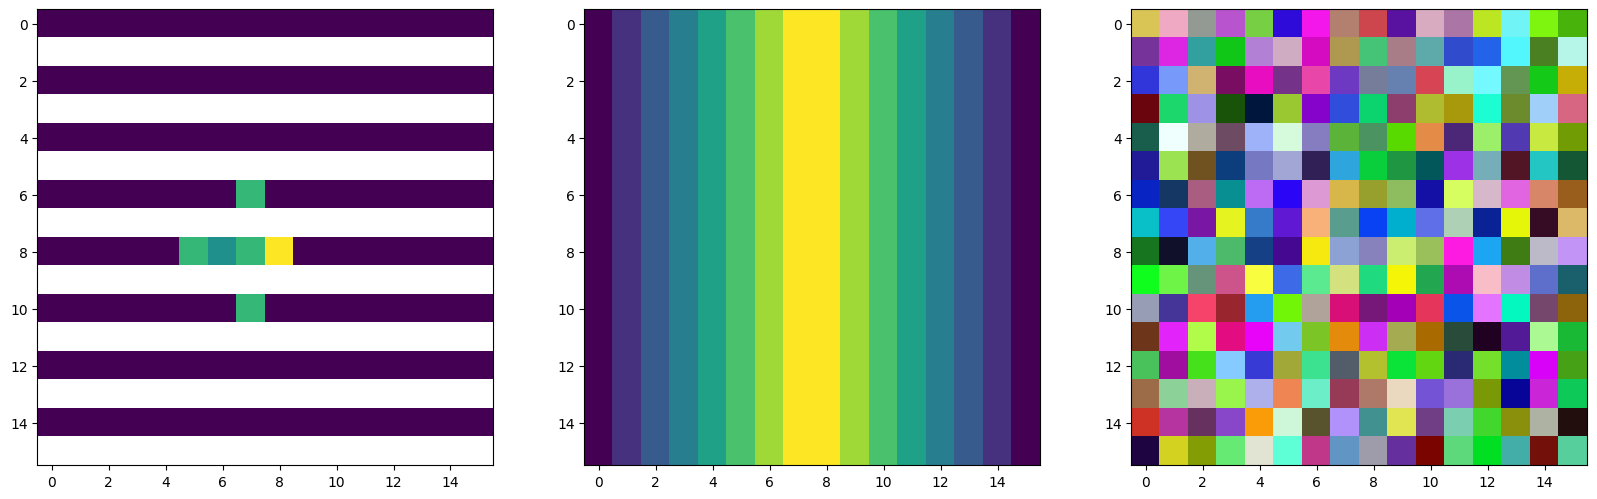

In [43]:
plt.subplot(1, 3, 1)
plt.imshow(A)

plt.subplot(1, 3, 2)
plt.imshow(B)

plt.subplot(1, 3, 3)
plt.imshow(rgb)

In [44]:
K_left = np.array([
    [721.5377,   0.    , 609.5593],
    [  0.    , 721.5377, 172.854 ],
    [  0.    ,   0.    ,   1.    ]
    ])

def rgbd_to_point_cloud(color, depth_map, flip=True):
    # Convert the depth map to Open3D depth image
    depth_image_o3d = o3d.geometry.Image(depth_map.astype(np.float32))

    # Convert the depth map to Open3D depth image
    color_image_o3d = o3d.geometry.Image(color)

    # Create RGBD image
    rgbd_image_o3d = o3d.geometry.RGBDImage.create_from_color_and_depth(
        color_image_o3d,
        depth_image_o3d,
        depth_scale=1,
        depth_trunc=70
    )

    # Create an Intrinsics object using camera parameters
    height, width = depth_map.shape
    fx, fy = K_left[0, 0], K_left[1, 1]
    cx, cy = K_left[0, 2], K_left[1, 2]
    intrinsic = o3d.camera.PinholeCameraIntrinsic(
        width, height, fx, fy, cx, cy)

    # Create a point cloud from the depth image
    point_cloud = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image_o3d, intrinsic)

    if flip:
        point_cloud.transform([
            [1, 0, 0, 0],
            [0, -1, 0, 0],
            [0, 0, -1, 0],
            [0, 0, 0, 1]
        ])

    return point_cloud

def depth_map_to_point_cloud(depth_map, flip=True):
    # Convert the depth map to Open3D depth image
    depth_image_o3d = o3d.geometry.Image(depth_map.astype(np.float32))

    # Create an Intrinsics object using camera parameters
    height, width = depth_map.shape
    fx, fy = K_left[0, 0], K_left[1, 1]
    cx, cy = K_left[0, 2], K_left[1, 2]
    intrinsic = o3d.camera.PinholeCameraIntrinsic(
        width, height, fx, fy, cx, cy)

    # Create a point cloud from the depth image
    point_cloud = o3d.geometry.PointCloud.create_from_depth_image(
        depth_image_o3d,
        intrinsic,
        # depth_scale=1,
        # depth_trunc=0.00070
    )

    if flip:
        point_cloud.transform([
            [1, 0, 0, 0],
            [0, -1, 0, 0],
            [0, 0, -1, 0],
            [0, 0, 0, 1]
        ])

    return point_cloud

/tmp/ipykernel_123254/1607268450.py:67: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(pg_depth - B), cmap='rainbow_r')


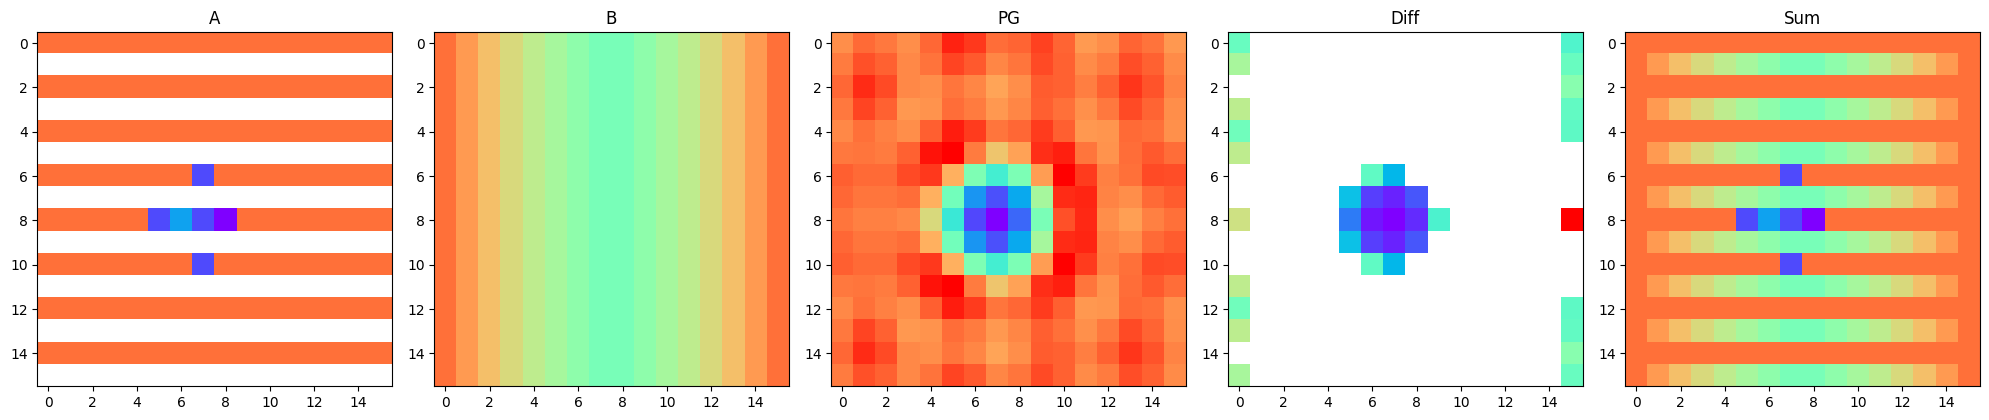

array([[10.63809346,  9.89862495, 10.18455832, 10.67396841,  9.83065654,
         8.67199219,  9.00844412,  9.98396182,  9.77704002,  9.14491874,
         9.81544168, 10.9454005 , 10.69170998,  9.78446412, 10.05405588,
        10.89666927],
       [10.25547599,  9.40040199,  9.75824096, 10.55201691, 10.09442965,
         9.19868784,  9.59126721, 10.47580337, 10.11664724,  9.29045271,
         9.71714144, 10.60926939, 10.23587756,  9.37538791,  9.76078084,
        10.62784077],
       [ 9.85129129,  8.81952131,  9.30167715, 10.57343269, 10.68111888,
        10.11353695, 10.50697328, 11.21839129, 10.67107524,  9.63693499,
         9.76082285, 10.3071984 ,  9.73401459,  8.93000675,  9.49302672,
        10.40097762],
       [10.19267375,  9.23172153,  9.7224103 , 10.88557468, 10.7854635 ,
         9.99250491, 10.2381571 , 10.93699895, 10.51074883,  9.67971418,
        10.01193448, 10.69967178, 10.16376459,  9.31121005,  9.8051488 ,
        10.69290527],
       [10.56764203, 10.0073804 , 10

In [56]:
def lpf(img, ncutoff):
    # Apply 2D FFT to the image
    f = np.fft.fft2(img)

    # Shift the zero frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)

    # Create a circular mask of the same size as the spectrum
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cutoff = int(min(crow, ccol)*ncutoff)
    cv2.circle(mask, (ccol, crow), cutoff, 1, -1)
    # cv2.ellipse(mask, (ccol, crow), (1, 2) * cutoff, 0, 0, 360,  1, -1)

    mask = np.asarray(mask)

    # Apply the mask to the shifted spectrum
    fshift_filtered = fshift * mask

    # Shift the zero frequency component back to the corner of the spectrum
    f_filtered = np.fft.ifftshift(fshift_filtered)

    # Apply the inverse 2D FFT to the filtered spectrum
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.real(img_filtered)

    return img_filtered


def pg(A, B, ncutoff, threshold=100):
    mask = ~np.isnan(A)
    filtered = B

    while threshold > 0:
        filtered[mask] = A[mask]
        filtered = lpf(filtered, ncutoff)
        threshold -= 1
        
    return filtered


pg_depth = pg(
    np.array(A.copy()),
    np.array(B.copy()),
    ncutoff=0.5,
    threshold=1000
)

# Plotting
vmin = np.min([np.ma.masked_invalid(np.log(pg_depth)).min(), np.ma.masked_invalid(np.log(B)).min()])
vmax = np.max([np.ma.masked_invalid(np.log(pg_depth)).max(), np.ma.masked_invalid(np.log(B)).max()])

plt.subplot(1, 5, 1)
plt.imshow(np.log(A), cmap='rainbow_r', vmin=vmin, vmax=vmax)
plt.title('A')

plt.subplot(1, 5, 2)
plt.imshow(np.log(B), cmap='rainbow_r', vmin=vmin, vmax=vmax)
plt.title('B')

plt.subplot(1, 5, 3)
plt.imshow(np.log(pg_depth), cmap='rainbow_r', vmin=vmin, vmax=vmax)
plt.title('PG')

plt.subplot(1, 5, 4)
plt.imshow(np.log(pg_depth - B), cmap='rainbow_r')
plt.title('Diff')

sum = B.copy()
sum[~np.isnan(A)] = A[~np.isnan(A)]

plt.subplot(1, 5, 5)
plt.imshow(np.log(sum), cmap='rainbow_r', vmin=vmin, vmax=vmax)
plt.title('Sum')

plt.tight_layout()
plt.show()

pg_depth

In [57]:
# Visualize the point cloud
o3d.visualization.draw_geometries([
    # rgbd_to_point_cloud(rgb, B),
    depth_map_to_point_cloud(A),
    rgbd_to_point_cloud(rgb, np.ascontiguousarray(pg_depth)),
])

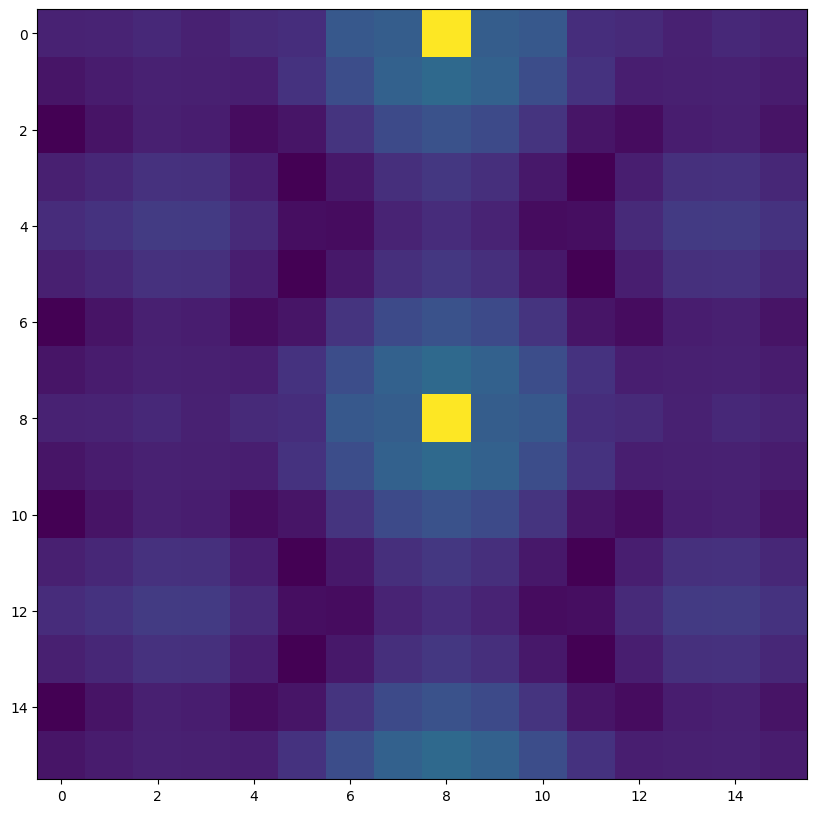

In [61]:
f = np.fft.fft2(sum) - np.fft.fft2(B)

fshift = np.fft.fftshift(f)

plt.imshow(np.abs(fshift))